In this notebook we go over the basics of using Python for scientific purposes. The chief libraries used by the scientific Python community are `numpy` (numerical Python, as introduced in in [1_basic_python](1_basic_python.ipynb)), `matplotlib.pyplot` (plotting), and `scipy` (statistics and other scientific functions not covered by `numpy`).

# arrays
We'll start with some of `numpy`'s useful features.

In [3]:
# renaming numpy to np on import is standard convention in scientific Python
import numpy as np

## 1-dimensional arrays

A 1-D numpy array is like a list, but it's much easier to perform operations over the whole array instead of on individual elements. Numpy arrays usually consist of elements that are all of the same type (e.g. int or float).

In [4]:
# basic numpy arrays can be created as follows:
x = np.array([.1, .2, 1, 5])

print(x)

# they can be manipulated with normal mathematical operations
print(x + 3)
print(x - 3)
print(x * 3)
print(x / 3)
print(x ** 3)

# check the dimension of x with "x.ndim"
print('')
print('The dimension of x is', x.ndim)

[0.1 0.2 1.  5. ]
[3.1 3.2 4.  8. ]
[-2.9 -2.8 -2.   2. ]
[ 0.3  0.6  3.  15. ]
[0.03333333 0.06666667 0.33333333 1.66666667]
[1.00e-03 8.00e-03 1.00e+00 1.25e+02]

The dimension of x is 1


Unlike MATLAB, by default all operations between 2 or more arrays are "element-wise", meaning that the operation is applied to every pair of elements (i.e. vector/matrix multiplication is not assumed by default—we'll get to that in a minute).

In [5]:
y = np.array([2, 3, 4, 5])

print(x + y)
print(x / y)
print(x ** y)

[ 2.1  3.2  5.  10. ]
[0.05       0.06666667 0.25       1.        ]
[1.000e-02 8.000e-03 1.000e+00 3.125e+03]


In [6]:
# if the arrays are different lengths, the operation will fail
z = np.array([2, 3, 4, 5, 6])
print(x + z)

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

Arrays behave like lists in many respects:

In [7]:
# indexing
print('Element 2 of x is', x[2])

Element 2 of x is 1.0


In [8]:
# len function
print('x has', len(x), 'elements:')
print('')

# looping over arrays
for ctr, el in enumerate(x):
    print('Element', ctr, 'is', el)

x has 4 elements:

Element 0 is 0.1
Element 1 is 0.2
Element 2 is 1.0
Element 3 is 5.0


Numpy provides a couple useful functions for creating patterned arrays.

In [1]:
# create a sequential array from 0 to array length minus 1
t = np.arange(10)
print(t)

# do the same but between two integers
t = np.arange(-5, 3)
print(t)

# do the same, but with a specific step size
t = np.arange(-5, 3, .5)
print(t)

NameError: name 'np' is not defined

In [10]:
# create an array of linearly spaced values between two endpoints (inclusive)
x = np.linspace(0, 1, 11)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
# create an array of 5 zeros
x_zeros = np.zeros(5)
print(x_zeros)

# create an array of 10 ones
x_ones = np.ones(10)
print(x_ones)

# create an array of 4 random numbers between 0 and 1
x_rand = np.random.rand(4)
print(x_rand)

# create an array of 5 Gaussian numbers with mean -1 and std .1
x_gaus = np.random.normal(-1, .1, 5)
print(x_gaus)

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.72290358 0.23248916 0.79716926 0.95448752]
[-1.13805226 -0.95138687 -1.11421192 -0.95267587 -0.94980102]


## 2-dimensional arrays

In [13]:
# 2-D arrays (i.e. matrices) are created as follows
x_2d = np.array([
    [1, 2, 3.3],
    [7, 8, 9.1],
    [12, 14.2, 16],
])

print(x_2d)
print('')
print('The dimension of x_2d is', x_2d.ndim)

# the shape of an array is returned by .shape
print('')
print('The size of x is', x.shape)
print('The size of x_2d is', x_2d.shape)

# note that len(x.shape) == x.ndim

[[ 1.   2.   3.3]
 [ 7.   8.   9.1]
 [12.  14.2 16. ]]

The dimension of x_2d is a 2

The size of x is (5,)
The size of x_2d is (3, 3)


2-D arrays are indexed as follows:

In [14]:
x_2d = np.array([
    [1, 2, 3.3],
    [7, 8, 9.1],
    [12, 14.2, 16],
])

# return an element at a specific (row, col) location
print(x_2d[0, 1])
print('')
print(x_2d[1, 2])
print('')

# return a full row
print(x_2d[1, :])
print('')

# return a full column
print(x_2d[:, 1])
print('')

# return a contiguous subset of rows
print(x_2d[1:3, :])
print('')

# return an arbitrary subset of rows
print(x_2d[[0, 2], :])

2.0

9.1

[7.  8.  9.1]

[ 2.   8.  14.2]

[[ 7.   8.   9.1]
 [12.  14.2 16. ]]

[[ 1.   2.   3.3]
 [12.  14.2 16. ]]


Note that when single rows/cols of 2-D arrays are indexed, they are returned as 1-D arrays.

As with 1-dim arrays, mathematical operations are assumed to be element-wise, even when matrices are involved.

In [15]:
x_2d = np.array([
    [1, 2, 3.3],
    [7, 8, 9.1],
    [12, 14.2, 16],
])

y_2d = np.array([
    [-1, .2, -6],
    [.1, .3, -3],
    [.7, .2, -1],
])

print(x_2d + y_2d)
print(x_2d * y_2d)

[[ 0.   2.2 -2.7]
 [ 7.1  8.3  6.1]
 [12.7 14.4 15. ]]
[[ -1.     0.4  -19.8 ]
 [  0.7    2.4  -27.3 ]
 [  8.4    2.84 -16.  ]]


## vector and matrix multiplication

1-D arrays can be converted to column or row vectors with the following syntax:

In [16]:
x_1d = np.array([0, -1, 1, -2, 2])

x_col = x_1d[:, None]
x_row = x_1d[None, :]

print(x_col)
print('')
print(x_row)

[[ 0]
 [-1]
 [ 1]
 [-2]
 [ 2]]

[[ 0 -1  1 -2  2]]


Vectors and matrices can be multiplied together using the '@' operator:

In [17]:
a_mat = np.array([
    [1., 6, 2., 2, 6],
    [7, 1, 2., 3, 6],
    [8, 2, 3, -1, -2],
    [6, 1, 2., 3, 6],
    [0, 1, 0, 1, -3],
])

print(a_mat @ a_mat)
print('')
print(x_row @ a_mat)
print('')
print(a_mat @ x_col)
print('')
print(x_row @ x_col)
print('')
print(x_col @ x_row)

[[71. 24. 24. 30. 32.]
 [48. 56. 28. 30. 44.]
 [40. 53. 27. 14. 54.]
 [47. 50. 26. 28. 38.]
 [13. -1.  4.  3. 21.]]

[[-11.   1.  -3.  -8. -26.]]

[[ 4.]
 [ 7.]
 [-1.]
 [ 7.]
 [-9.]]

[[10]]

[[ 0  0  0  0  0]
 [ 0  1 -1  2 -2]
 [ 0 -1  1 -2  2]
 [ 0  2 -2  4 -4]
 [ 0 -2  2 -4  4]]


Note that the result is always another 2-d array.

The usual rules of matrix multiplication apply, so you'll get an error if your sizes don't match up:

In [18]:
print(a_mat @ x_row)

ValueError: shapes (5,5) and (1,5) not aligned: 5 (dim 1) != 1 (dim 0)

## other useful array operations

Transpose (only works for 2D arrays)

In [82]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
print(x)
print('')

print(np.transpose(x))
print('')

# equivalent shortcut
print(x.T)
print('')

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 4 7]
 [2 5 8]
 [3 6 9]]

[[1 4 7]
 [2 5 8]
 [3 6 9]]



Max and argmax:

In [19]:
x = np.array([
    [1.5, 3.2, 5.1, 6.2],
    [1.1, -1.2, 3.4, 1.5],
    [7.7, 1.5, 2.2, 10.6],
])

print(np.max(x))
print('')
print(np.max(x, axis=0))
print(np.max(x, axis=1))
print('')
print(np.argmax(x, axis=0))
print(np.argmax(x, axis=1))

10.6

[ 7.7  3.2  5.1 10.6]
[ 6.2  3.4 10.6]

[2 0 0 2]
[3 2 3]


Min and argmin:

In [20]:
x = np.array([
    [1.5, 3.2, 5.1, 6.2],
    [1.1, -1.2, 3.4, 1.5],
    [7.7, 1.5, 2.2, 10.6],
])

print(np.min(x))
print('')
print(np.min(x, axis=0))
print(np.min(x, axis=1))
print('')
print(np.argmin(x, axis=0))
print(np.argmin(x, axis=1))

-1.2

[ 1.1 -1.2  2.2  1.5]
[ 1.5 -1.2  1.5]

[1 1 2 1]
[0 1 1]


Means, stds, and sums

In [21]:
x = np.array([
    [1.5, 3.2, 5.1, 6.2],
    [1.1, -1.2, 3.4, 1.5],
    [7.7, 1.5, 2.2, 10.6],
])

print(np.mean(x))
print('')
print(np.mean(x, axis=0))
print(np.mean(x, axis=1))
print('')

print(np.std(x))
print('')
print(np.std(x, axis=0))
print(np.std(x, axis=1))
print('')

print(np.sum(x))
print('')
print(np.sum(x, axis=0))
print(np.sum(x, axis=1))
print('')

3.566666666666667

[3.43333333 1.16666667 3.56666667 6.1       ]
[4.  1.2 5.5]

3.155506650638249

[3.02140512 1.81169043 1.18977122 3.71573232]
[1.79861057 1.63554272 3.79934205]

42.800000000000004

[10.3  3.5 10.7 18.3]
[16.   4.8 22. ]



(Note the dimension of each result.)

Means, stds, and sums with NaN values

In [22]:
# sometimes arrays are missing data
# in scientific Python, missing data points are indicated with "np.nan"
x = np.array([
    [1.5, 3.2, np.nan, 6.2],
    [1.1, -1.2, 3.4, 1.5],
    [np.nan, 1.5, 2.2, np.nan],
])

# numpy has nanmean, nanstd, and nansum functions
# that perform the corresponding functions with NaN values ignored
print(np.nanmean(x))
print('')
print(np.nanmean(x, axis=0))
print(np.nanmean(x, axis=1))
print('')

print(np.nanstd(x))
print('')
print(np.nanstd(x, axis=0))
print(np.nanstd(x, axis=1))
print('')

print(np.nansum(x))
print('')
print(np.nansum(x, axis=0))
print(np.nansum(x, axis=1))
print('')

2.155555555555556

[1.3        1.16666667 2.8        3.85      ]
[3.63333333 1.2        1.85      ]

1.9050290817909146

[0.2        1.81169043 0.6        2.35      ]
[1.94307889 1.63554272 0.35      ]

19.400000000000002

[2.6 3.5 5.6 7.7]
[10.9  4.8  3.7]



Eigenvalues and vectors

In [23]:
x = np.array([
    [1., 2, -.5],
    [2, 2., 3],
    [-.5, 3, .5],
])

eig_rslt = np.linalg.eig(x)

eig_vals = eig_rslt[0]
eig_vecs = eig_rslt[1]

print('Eig vals', eig_vals)
print('')

# loop over eig vecs (cols of eig_rslt[1])
print('Eig vecs:')
for ctr in range(eig_vecs.shape[1]):
    print('Eig vec', ctr, 'is', eig_vecs[:, ctr])

Eig vals [-2.62119438  1.30776666  4.81342772]

Eig vecs:
Eig vec 0 is [ 0.43090085 -0.61512163  0.66026497]
Eig vec 1 is [-0.83307885  0.0100687   0.55306261]
Eig vec 2 is [0.34684878 0.78836793 0.50810621]


## n-dimensional arrays
In Python you can make arrays of arbitrary dimension as follows:

In [24]:
x = np.array([
    [
        [1, 2, 3],
        [4, 5, 6],
    ],
    
    [
        [6, 3, 1.3],
        [6, 2, 1.1],
    ],
    
    [
        [1.2, 5.1, 9.2],
        [7.3, 1.1, 2],
    ]
])

print(x)
print('')
print('The dimension of x is', x.ndim)
print('The shape of x is', x.shape)

[[[1.  2.  3. ]
  [4.  5.  6. ]]

 [[6.  3.  1.3]
  [6.  2.  1.1]]

 [[1.2 5.1 9.2]
  [7.3 1.1 2. ]]]

The dimension of x is 3
The shape of x is (3, 2, 3)


# logical/boolean masking
Indexing values in an array using a mask is often more practical than identifying the numerical indices of the elements to be manipulated. This is very similar to MATLAB.

In [25]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

mask = (x > 5)

print(x)
print('')
print(mask)
print('')
print(x[mask])  # note this returns a 1-D array
print('')

# set all masked values to zero
x[mask] = 0
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[False False False]
 [False False  True]
 [ True  True  True]]

[6 7 8 9]

[[1 2 3]
 [4 5 0]
 [0 0 0]]


# scientific notation

We can denote very large or small numbers using the following syntax for scientific notation.

In [84]:
r = 20e6  # 20 mega ohm resistance
i = 1e-9  # 1 nano-amp current
print('r =', r, 'Ohm')
print('i =', i, 'Amp')

print('v = ir =', i*r, 'V')

r = 20000000.0 Ohm
i = 1e-09 Amp
v = ir = 0.02 V


# plotting

This is science, let's plot stuff!

Tell Jupyter to show inline plots then import the main plotting library.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

Plot a few different curves:

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


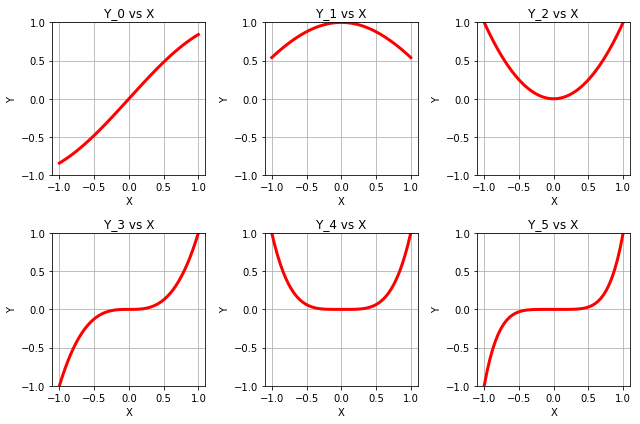

In [37]:
# independent variable
x = np.linspace(-1, 1, 50)  # 50 evenly spaced values from -1 to 1
# dependent variables
ys = [np.sin(x), np.cos(x), x**2, x**3, x**4, x**5]

# make a figure and (2 row, 3 col) axis array 12" wide and 6" tall
fig, axs = plt.subplots(2, 3, figsize=(9, 6), tight_layout=True, squeeze=False)
# (squeeze=False makes it so axs is always a 2D array)
# (tight_layout is a flag matplotlib uses to better automaticalyl align figure layout)

y_ctr = 0
# loop over rows of axs array
for ax_row in axs:
    # loop over axes in ax_row
    for ax in ax_row:
        
        # plot y vs x for this axis
        y = ys[y_ctr]
        ax.plot(x, y, c='r', lw=3, ls='-')
        
        # set limits
        ax.set_ylim(-1, 1)
        
        # label axis
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Y_' + str(y_ctr) + ' vs X')
        
        # turn on grid
        ax.grid()
        
        # increment y_ctr
        y_ctr += 1  # shortcut for y_ctr = y_ctr + 1
        
# note: don't worry about the warning

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


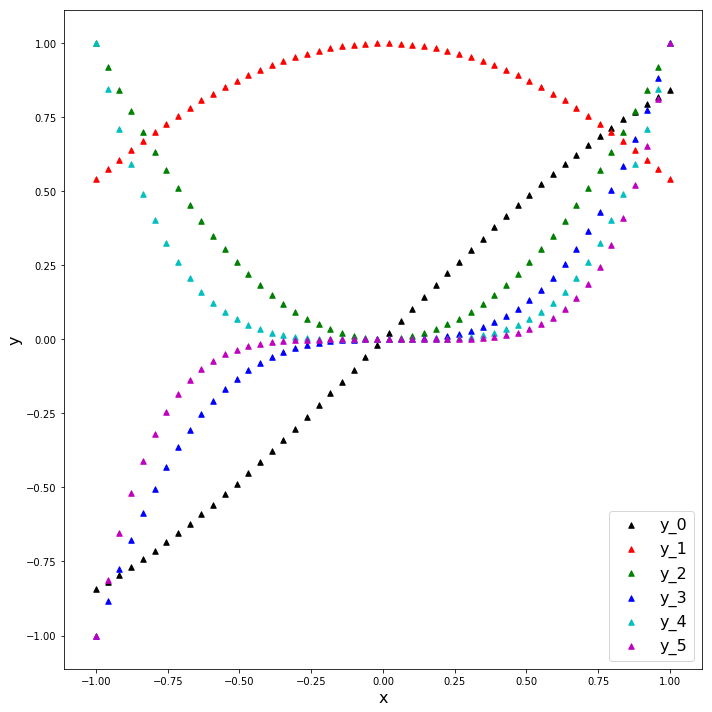

In [41]:
# we can also plot multiple curves on one axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)
# when squeeze is not specified and axis array size is (1, 1), only an axis is returned, not an array

cs = ['k', 'r', 'g', 'b', 'c', 'm']

for y, c in zip(ys, cs):
    
    # let's do a scatter plot this time
    ax.scatter(x, y, c=c, s=30, marker='^')  # s specifies marker size
    
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)

# add a legend
ax.legend(['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5'], fontsize=16)

Text(0,0.5,'y')

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


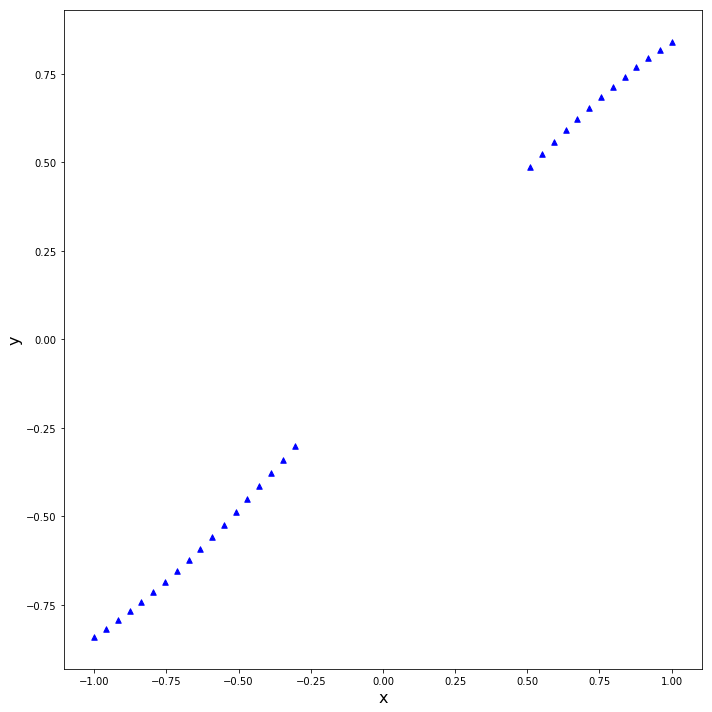

In [43]:
# we can hide values by setting them to nan in the x or y arrays we're plotting
ys[0][(x > -.3) & (x < .5)] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

ax.scatter(x, ys[0], c='b', s=30, marker='^')  # s specifies marker size
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)

Matplotlib can make an extremely flexible diversity of plots, so check out [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html) to find out how to make specific types, like heatmaps, bar charts, contour plots, etc. The above shows the basic idea behind plotting.

# simulations

The following shows how a basic simulation can be implemented in Python, something we'll frequently need to do. We'll simulate a leaky integrate-and-fire (LIF) neuron responding to a constant current input.

An LIF neuron obeys the following eqn:

$\tau\cfrac{dv}{dt} = -(v - v_{rest}) + IR$

$v > v_{th} \implies v \rightarrow v_{rest}$

where $v$ is the membrane voltage, $v_{rest}$ is the resting potential, and $I$ is a constant current input, and R the membrane resistance. When $v$ crosses a "spike" threshold $v_{th}$, we note the neuron has spiked and reset $v$ to $v_{rest}$.

This can be discretized as

$\tau\cfrac{v_{n+1} - v_n}{\Delta t} = -(v_n - v_{rest}) + IR$

or

$v_{n+1} = v_n + \cfrac{\Delta t}{\tau}\left[-(v_n - v_{rest}) + IR\right]$ .

$v_{n+1} > v_{th} \implies v_{n+1} \rightarrow v_{rest}$

We can simulate it with a for loop:

Text(0.5,1,'Basic LIF neuron simulation')

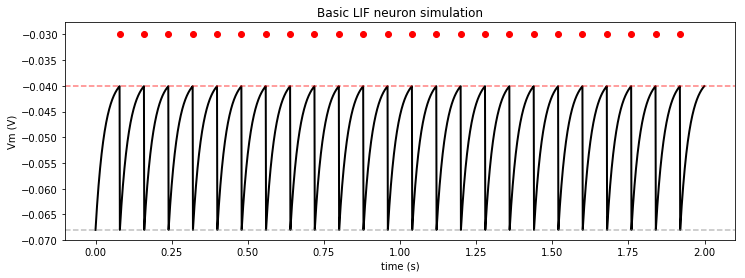

In [53]:
DT = 0.001  # use 1 ms numerical integration time
V_REST = -0.068  # rest potential (V)
TAU = 0.03  # 30 ms time constant
V_TH = -0.04  # spike threshold
IR = .03  # input current-resistance product (V)

ts = np.arange(0, 2, DT)  # simulate for 2 seconds

vs = np.nan * np.zeros(len(ts))  # initialize voltage array

vs[0] = V_REST  # start at V_REST
spk_times = []  # list of spike times

# run smln
for t_ctr, t in enumerate(ts):
    
    # break if we're at the end
    if t_ctr == len(ts) - 1:
        break
        
    # update voltage
    v_n = vs[t_ctr]
    vs[t_ctr+1] = v_n + (DT/TAU) * (-(v_n - V_REST) + IR)
    
    # check for spike
    if vs[t_ctr+1] > V_TH:
        # reset v
        vs[t_ctr+1] = V_REST
        # note time of spike
        spk_times.append(t)
        

# plot response
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# voltages
ax.plot(ts, vs, c='k', lw=2)

# spikes
y_spk = -0.03
ax.scatter(spk_times, y_spk*np.ones(len(spk_times)), c='r')

# rest potential and spike threshold
ax.axhline(V_REST, c='gray', alpha=0.5, ls='--')
ax.axhline(V_TH, c='r', alpha=0.5, ls='--')

ax.set_xlabel('time (s)')
ax.set_ylabel('Vm (V)')
ax.set_title('Basic LIF neuron simulation')

# saving and loading results

Sometimes you want to store or load variables on your hard drive so your results can persist when the notebook shuts down. The easiest way to do this is using `np.save` and `np.load`.

In [2]:
import numpy as np

In [6]:
x = np.arange(10) ** 2
print('x =', x)
print('')

y = x/10
print('y =', y)
print('')

z = np.arange(20).reshape((4, 5))
print('z =')
print(z)
print('')

w = ['a', 2, np.array([4, 4, 3]), None, 5]  # we can save arbitrary data types like a list
print('w =')
print(w)
print('')

# save data
# make data array/dict (this is a bit weird, but is the simplest way and essentially always works)
save_data = np.array([
    {'x': x, 'y': y, 'z': z, 'w': w}
])
np.save('my_data.npy', save_data)

# load data
load_data = np.load('my_data.npy')[0]

x_loaded = load_data['x']
y_loaded = load_data['y']
z_loaded = load_data['z']
w_loaded = load_data['w']

print('x_loaded =', x_loaded)
print('')
print('y_loaded =', y_loaded)
print('')
print('z_loaded =')
print(z_loaded)
print('')
print('w_loaded =')
print(w_loaded)

# look in the tutorial directory now -- you should see a new file called my_data.npy

x = [ 0  1  4  9 16 25 36 49 64 81]

y = [0.  0.1 0.4 0.9 1.6 2.5 3.6 4.9 6.4 8.1]

z =
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

w =
['a', 2, array([4, 4, 3]), None, 5]

x_loaded = [ 0  1  4  9 16 25 36 49 64 81]

y_loaded = [0.  0.1 0.4 0.9 1.6 2.5 3.6 4.9 6.4 8.1]

z_loaded =
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

w_loaded =
['a', 2, array([4, 4, 3]), None, 5]


# statistics

You can find most statistical tests in scipy.stats.

For example, to run a t-test to determine whether two sample means are different you can use `stats.ttest_ind`:

T =  -5.374970688110928
P =  1.6117725163868018e-07


/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


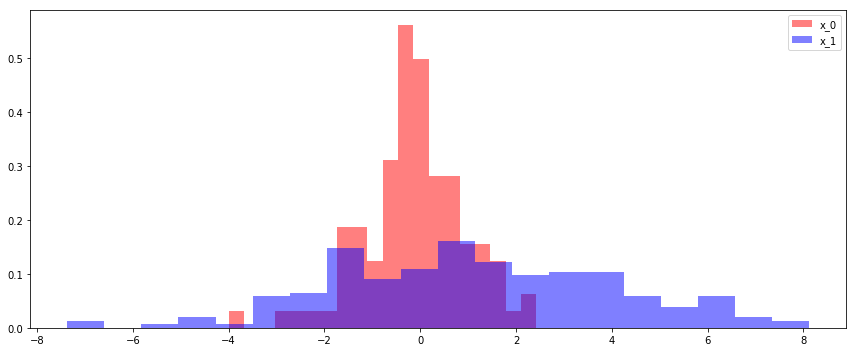

In [75]:
from scipy import stats

# make two fake populations
x_0 = np.random.normal(0, 1, 100)
x_1 = np.random.normal(1, 3, 200)

# plot histograms
fig, ax = plt.subplots(1, 1, figsize=(12, 5), tight_layout=True)
ax.hist(x_0, bins=20, color='r', alpha=0.5, normed=True)
ax.hist(x_1, bins=20, color='b', alpha=0.5, normed=True)

ax.legend(['x_0', 'x_1'])

t_val, p_val = stats.ttest_ind(x_0, x_1, equal_var=False)

print('T = ', t_val)
print('P = ', p_val)

Some other common statistical tests are:

[stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

[stats.kstest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

[stats.ks_2samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html)

[stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)

[stats.spearmanr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html)

Most of these functions return two values: [test statistic, p-value].